In [1]:
import os
import numpy as np
from itertools import permutations
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from math import pi
from utils import *
%matplotlib inline
set_matplotlib_formats('png')
plt.rcParams['figure.figsize']=[10,5]

In [2]:
# CONFIGURATION
set_save_figures(True)

# Input Signal

In [3]:
# Raised Cosine Filter borrowed from:
# https://github.com/veeresht/CommPy/blob/master/commpy/filters.py
def rcosfilter(N, alpha, Ts, Fs):
    """
    Generates a raised cosine (RC) filter (FIR) impulse response.
    Parameters
    ----------
    N : int
        Length of the filter in samples.
    alpha : float
        Roll off factor (Valid values are [0, 1]).
    Ts : float
        Symbol period in seconds.
    Fs : float
        Sampling Rate in Hz.
    Returns
    -------
    time_idx : 1-D ndarray (float)
        Array containing the time indices, in seconds, for the impulse response.
    h_rc : 1-D ndarray (float)
        Impulse response of the raised cosine filter.
    """

    T_delta = 1/float(Fs)
    time_idx = ((np.arange(N)-N/2))*T_delta
    sample_num = np.arange(N)
    h_rc = np.zeros(N, dtype=float)

    for x in sample_num:
        t = (x-N/2)*T_delta
        if t == 0.0:
            h_rc[x] = 1.0
        elif alpha != 0 and t == Ts/(2*alpha):
            h_rc[x] = (np.pi/4)*(np.sin(np.pi*t/Ts)/(np.pi*t/Ts))
        elif alpha != 0 and t == -Ts/(2*alpha):
            h_rc[x] = (np.pi/4)*(np.sin(np.pi*t/Ts)/(np.pi*t/Ts))
        else:
            h_rc[x] = (np.sin(np.pi*t/Ts)/(np.pi*t/Ts))* \
                    (np.cos(np.pi*alpha*t/Ts)/(1-(((2*alpha*t)/Ts)*((2*alpha*t)/Ts))))

    return time_idx, h_rc      

In [4]:
Fs = 1000
Ts = 20/Fs
Ts_samples = int(Ts*Fs)
pulse_cycles=8
pulse_length=Ts_samples*pulse_cycles
pattern_length=6
# Total length is pattern symbols by the symbol length + half of the total pulse on the beginning and end
total_samples=pattern_length*Ts_samples+pulse_length

# Get the permutations of symbols to generate the eye diagram
symbols = [1,-1,3,-3]
patterns = set(permutations(np.tile(symbols,pattern_length),pattern_length))

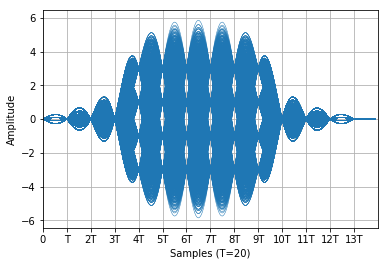

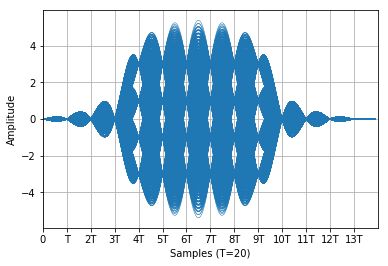

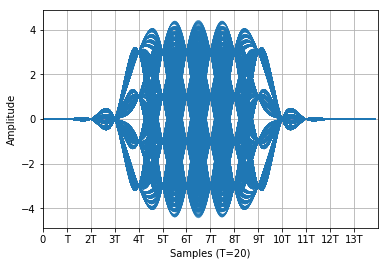

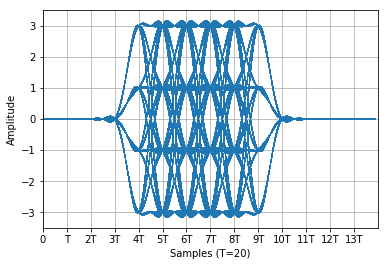

In [5]:
betas = [0,0.25,0.5,1]


xticks=np.arange(0,total_samples,Ts_samples)
xtick_labels=[0,"T"]+[ f'{n}T' for n in np.arange(2,pulse_cycles+pattern_length).tolist()]

for beta in betas:
    rc_t,rc = rcosfilter(pulse_length,beta,Ts,Fs)
    plt.figure()
    plt.grid(axis='both')
    plt.xlim(0,total_samples)
    plt.ylabel('Amplitude')
    plt.xlabel(f'Samples (T={Ts_samples})')
    plt.xticks(xticks,xtick_labels)  
    for pattern in patterns:
        msg = np.zeros(Ts_samples*len(pattern))
        for i,sym in enumerate(pattern):
            msg[i*Ts_samples]=sym
        pulses = np.convolve(msg,rc)
        plt.plot(pulses,'tab:blue',linewidth=0.5)
    save_figure(f'4-level-rc-eye-b={beta}');

